In [1]:
import os

import marvin
from marvin.tools.image import Image
from marvin.tools import Maps
import marvin.utils.plot.map as mapplot

import math
import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats
from astropy.wcs import WCS

from astropy.io import fits

with fits.open('./data/galaxies_sorted.fits') as hdulist:
    plateifu_list = hdulist[1].data['plateifu']
    ra = hdulist[1].data['RA']
    dec = hdulist[1].data['Dec']
    

mapnames = 'maps.emline_gflux_ha_6564'
errormap = ''

lofar_file_path = './data/lofar_imgs/'
lofar_list = os.listdir(lofar_file_path)
lofar_list = np.sort(lofar_list)

import warnings 
warnings.filterwarnings("ignore")

[INFO]: No release version set. Setting default to DR15


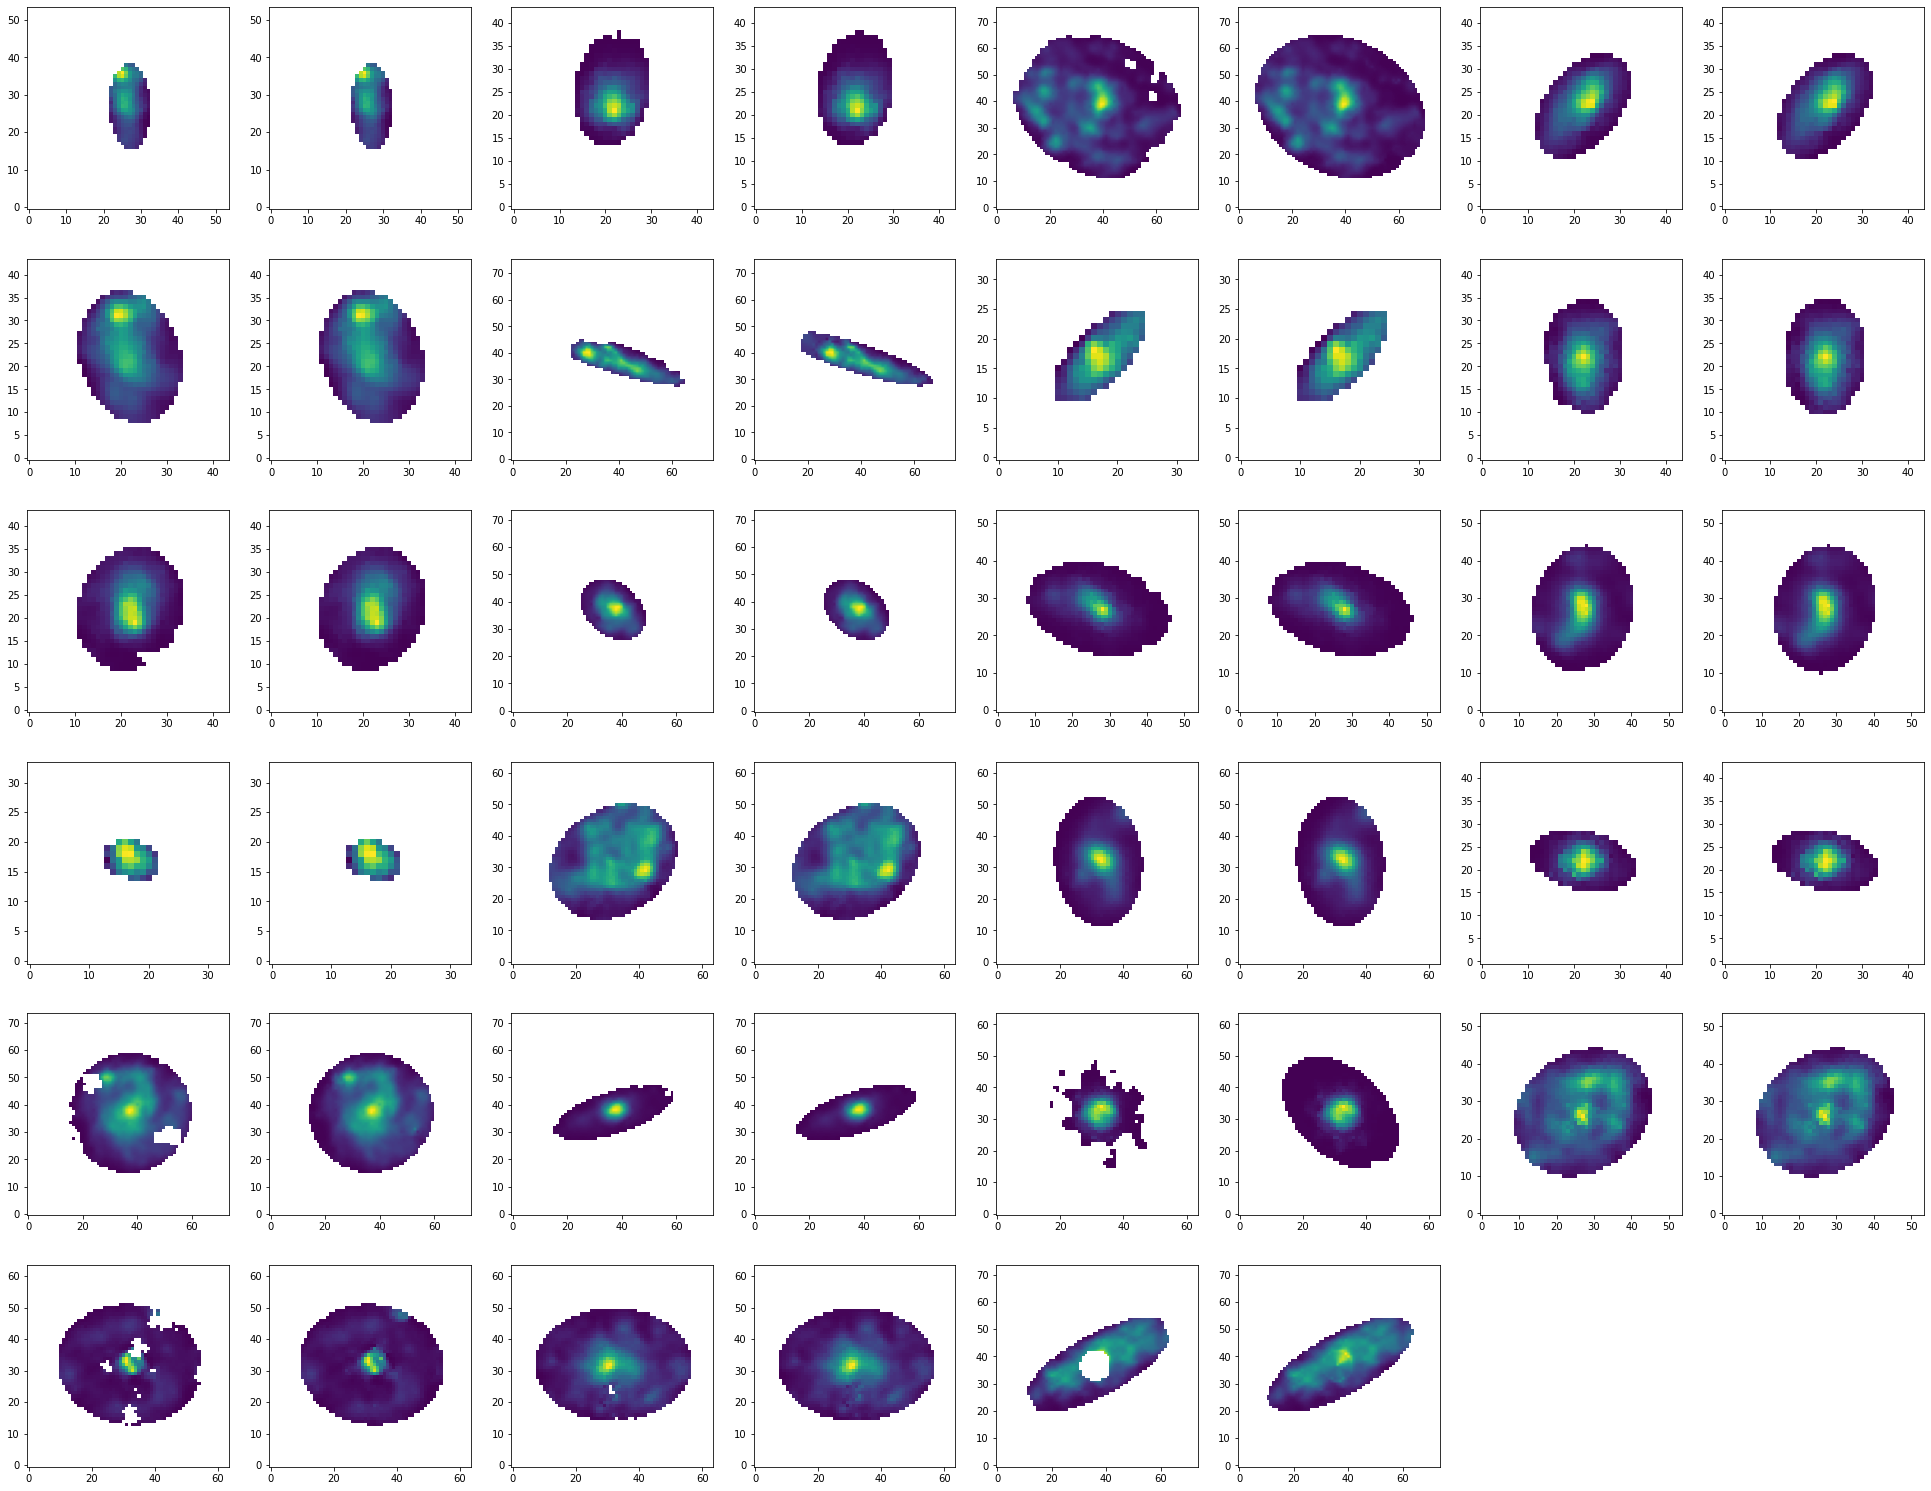

In [3]:
import jf
fig, axs = plt.subplots(nrows=6, ncols=8, figsize=(34, 27))
for i in range(6):
    for j in range(4):
        if i*4+j<23:
            gal = jf.Mymaps(plateifu=plateifu_list[i*4+j], max_radii=1.5, interp = True)
            axs[i, 2*j].imshow(gal.sfr_map, origin='lower')
            axs[i, 2*j+1].imshow(gal.sfr_noholes, origin='lower')
fig.delaxes(axs[5,6])
fig.delaxes(axs[5,7])

In [2]:
import jf
from tqdm import trange
import pandas as pd

# with fits.open('./data/control_manga_area_min0.9.fits') as hdulist:
#     plateifu_list_control = hdulist[1].data['plateifu']

with fits.open('./data2/control_stat_LoTSS_129.fits') as hdulist:
    plateifu_list_control = hdulist[1].data['plateifu']



control = pd.DataFrame(index=np.arange(14))
for i in trange(len(plateifu_list_control)):
    plateifu = plateifu_list_control[i]
    meds, indices =jf.radibin(plateifu=plateifu)
    control[plateifu]=pd.Series(data=meds, index=indices)

100%|██████████| 129/129 [01:01<00:00,  2.09it/s]


In [3]:
jelly = pd.DataFrame()
for i in trange(22):
    plateifu = plateifu_list[i]
    meds, indices =jf.radibin(plateifu=plateifu)
    jelly[plateifu]=pd.Series(data=meds, index=indices)

100%|██████████| 22/22 [00:10<00:00,  2.05it/s]


In [4]:
control_nor = control.div(np.asarray(control.loc[[0]]))
jelly_nor = jelly.div(np.asarray(jelly.loc[[0]]))

100%|██████████| 22/22 [00:00<00:00, 2011.88it/s]


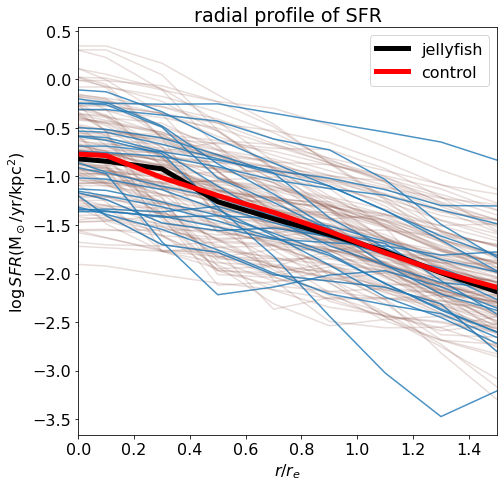

In [8]:
import jf
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=[7.5,7.5])
ax = plt.axes()

for i in trange(len(plateifu_list_control)):
    plateifu = plateifu_list_control[i]
    x = control[plateifu].index * 0.2- 0.1
    x = np.asarray(x)
    x[0] = 0.0
    ax.plot(x, np.log10(control[plateifu]), c = "C5", alpha=0.2)

for i in trange(22):
    plateifu = plateifu_list[i]
    x = jelly[plateifu].index * 0.2- 0.1
    x = np.asarray(x)
    x[0] = 0.0
    ax.plot(x, np.log10(jelly[plateifu]), c = "C0", alpha=0.8)

jelly_med = jelly.median(axis =1, skipna=True)
control_med = control.median(axis=1, skipna=True)

x = jelly_med.index * 0.2- 0.1
ax.plot(x, np.log10(jelly_med), c = 'k', linewidth=5, label='jellyfish')

x = control_med.index * 0.2- 0.1
ax.plot(x, np.log10(control_med), c = 'r', linewidth=5, label='control')

ax.set_xlim(0,1.5)

ax.set_xlabel(r'$r/r_e$')
ax.set_ylabel(r'$\log{SFR}(\mathrm{M_\odot/yr/kpc^2})$')
ax.set_title('radial profile of SFR')

plt.legend()

100%|██████████| 22/22 [00:00<00:00, 1778.96it/s]


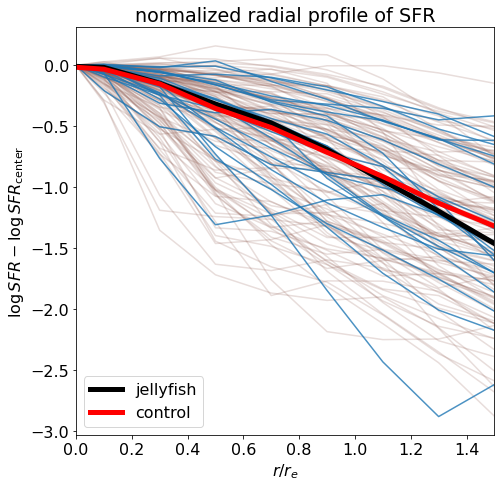

In [9]:
import jf
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=[7.5,7.5])
ax = plt.axes()


for i in trange(len(plateifu_list_control)):
    plateifu = plateifu_list_control[i]
    x = control_nor[plateifu].index * 0.2- 0.1
    x = np.asarray(x)
    x[0] = 0.0
    ax.plot(x, np.log10(control_nor[plateifu]), c = "C5", alpha=0.2)

for i in trange(22):
    plateifu = plateifu_list[i]
    x = jelly_nor[plateifu].index * 0.2- 0.1
    x = np.asarray(x)
    x[0] = 0.0
    ax.plot(x, np.log10(jelly_nor[plateifu]), c = "C0", alpha=0.8)

jelly_nor_med = jelly_nor.median(axis =1, skipna=True)
control_nor_med = control_nor.median(axis=1, skipna=True)

x = jelly_med.index * 0.2- 0.1
ax.plot(x, np.log10(jelly_nor_med), c = 'k', linewidth=5, label='jellyfish')

x = control_med.index * 0.2- 0.1
ax.plot(x, np.log10(control_nor_med), c = 'r', linewidth=5, label='control')

ax.set_xlim(0,1.5)

ax.set_xlabel(r'$r/r_e$')
ax.set_ylabel(r'$\log{SFR}-\log{SFR_\mathrm{center}}$')
ax.set_title('normalized radial profile of SFR')
plt.legend()